# **Laporan Proyek Machine Learning - Shefiyyah Aurellia Wahyudi**

## **Domain Proyek**

Menyelidiki faktor-faktor risiko yang diketahui dan mungkin terkait dengan diabetes. Pemahaman mendalam tentang mekanisme biologis yang terlibat dalam perkembangan penyakit ini dapat membantu dalam pemilihan fitur-fitur penting untuk model prediksi.

## **Business Understanding**

1. Deteksi Dini dan Manajemen Penyakit
2. Pengembangan Model Prediktif sebagai Alat Bantu Profesional Kesehatan

###  **Problem Statements**

1. Pasien tidak tahu apakah dia terkena diabetes atau tidak
2. Faktor-faktor apa saja yang menyebabkan terkena penyakit diabetes?

### **Goals**

Dengan Menggunakan Dataset pasien ini, kita dapat membuat model machine learning untuk memprediksi pakah pasien di dataset punya penyakit diabetes atau bukan

##### **Solution statements**

Dengan membuat model machine learning dengan Model Development dari K-Nearest Neighbor kita dapat mengetahui yang mana saja pasien yang terkena penyakit diabetes

### Data Loading

Pertama, import library yang dibutuhkan. Anda dapat melakukannya di awal, atau di tiap kode sel.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

Kemudian, tuliskan kode load the dataset

In [2]:
url = 'dataset/diabetes.csv'
diabetes = pd.read_csv(url)
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Output kode di atas memberikan informasi sebagai berikut:<br>

- Ada 768 baris (records atau jumlah pengamatan) dalam dataset.
- Terdapat 9 kolom yaitu: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome.

## **Data Understanding**

Cakupan proses EDA sangat luas. Namun, secara umum, Anda dapat melakukan proses EDA untuk menjawab beberapa pertanyaan berikut: <br>

- Apa saja jenis variabel pada dataset?
- Bagaimana distribusi variabel dalam dataset?
- Apakah ada missing value?
- Apakah ada fitur yang tidak berguna (redundant)?
- Bagaimana korelasi antara fitur dan target?<br>

Umumnya, teknik EDA dibagi menjadi dua cara. Pertama, setiap metode bersifat **grafis atau non-grafis**. Kedua, setiap metode bersifat **univariate (melibatkan satu variate atau variabel)** dan **multivariate (melibatkan dua atau lebih variabel)**. <br>

Univariate berasal dari kata "uni" yang artinya satu dan "variate" yang berarti variasi. Jadi, analisis univariate adalah cara kita melakukan analisis terhadap satu jenis (variasi) variabel saja. Dengan kata lain, analisis univariate merupakan proses untuk mengeksplorasi dan menjelaskan setiap variabel dalam kumpulan data secara terpisah. <br>

Sedangkan, multivariate berasal dari kata "multi" yang artinya banyak dan "variate" yang berarti variasi. Jadi, analisis multivariate adalah cara kita melakukan analisis terhadap banyak variasi variabel. Dengan kata lain, multivariate analysis merupakan proses eksplorasi yang melibatkan banyak (dua atau lebih) variabel pada data.

### Deskripsi Variabel

Berdasarkan informasi dari Kaggle, variabel-variabel pada Diamond dataset adalah sebagai berikut: <br>

- Pregnancies: Berapa kali hamil
- Glucose: Konsentrasi glukosa plasma 2 jam dalam tes toleransi glukosa oral
- BloodPressure: Tekanan darah diastolik (mm Hg)
- SkinThickness: Ketebalan lipatan kulit trisep (mm)
- Insulin: Insulin serum 2 jam (mm U/ml)
- BMI: Indeks massa tubuh (berat badan dalam kg/(tinggi badan dalam m)^2)
- DiabetesPedigreeFunction: Fungsi silsilah Diabetes
- Age: umur(tahun)
- Outcome: Variabel kelas (0 atau 1) 268 dari 768 adalah 1, yang lainnya adalah 0

Setelah memahami deskripsi variabel pada data, langkah selanjutnya adalah mengecek informasi pada dataset dengan fungsi info() berikut.

In [3]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Dari output terlihat bahwa:<br>

- Terdapat 7 kolom numerik dengan tipe data int64 yaitu: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, Age, Outcome. 
- Terdapat 2 kolom numerik dengan tipe data float64, yaitu: BMI, DiabetesPedigreeFunction

**Uraian di atas menunjukkan bahwa setiap kolom telah memiliki tipe data yang sesuai. Selanjutnya, Anda perlu mengecek deskripsi statistik data dengan fitur describe().**

In [4]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Fungsi describe() memberikan informasi statistik pada masing-masing kolom, antara lain: <br>

- Count  adalah jumlah sampel pada data.
- Mean adalah nilai rata-rata.
- Std adalah standar deviasi.
- Min yaitu nilai minimum setiap kolom. 
- 25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama. 
- 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
- 75% adalah kuartil ketiga.
- Max adalah nilai maksimum.

### Menangani Missing Value

Dari hasil fungsi describe(), nilai minimum untuk **kolom Glucose, BloodPressure, SkinThickness, Insulin, BMI, dan Outcome   adalah 0**. Seperti kita tahu, BloodPressure, SkinThickness, Insulin, BMI, dan Outcome adalah beberapa istilah yang umumnya terkait dengan masalah kesehatan dan diagnosis, terutama dalam konteks diabetes yang memiliki jumlah dan tidak mungkin 0. Kita patut menduga bahwa ini merupakan data yang tidak valid atau sering disebut missing value. Mari kita cek ada berapa missing value pada kolom kolom Glucose, BloodPressure, SkinThickness, Insulin, BMI, dan Outcome.

In [5]:
b = (diabetes.Glucose == 0).sum()
c = (diabetes.BloodPressure == 0).sum()
d = (diabetes.SkinThickness == 0).sum()
e = (diabetes.Insulin == 0).sum()
f = (diabetes.BMI == 0).sum()
g = (diabetes.Outcome == 0).sum()
 
print("Nilai 0 di kolom b ada: ", b)
print("Nilai 0 di kolom c ada: ", c)
print("Nilai 0 di kolom d ada: ", d)
print("Nilai 0 di kolom e ada: ", e)
print("Nilai 0 di kolom f ada: ", f)
print("Nilai 0 di kolom g ada: ", g)

Nilai 0 di kolom b ada:  5
Nilai 0 di kolom c ada:  35
Nilai 0 di kolom d ada:  227
Nilai 0 di kolom e ada:  374
Nilai 0 di kolom f ada:  11
Nilai 0 di kolom g ada:  500


In [6]:
diabetes.loc[(diabetes['Outcome']==0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


In [7]:
import pandas as pd

# Misalnya, jika Anda memiliki DataFrame 'data':
# Ganti nilai 0 dengan NaN pada kolom yang memiliki nilai kosong
columns_with_missing_values = ['BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Glucose']
diabetes[columns_with_missing_values] = diabetes[columns_with_missing_values].replace(0, pd.NA)

# Sekarang, gantilah nilai NaN dengan mean pada masing-masing kolom
for column in columns_with_missing_values:
    diabetes[column].fillna(diabetes[column].mean(), inplace=True)

In [8]:
import pandas as pd

# Misalnya, jika Anda memiliki DataFrame 'data' dan ingin menggantikan nilai missing di kolom 'BloodPressure' dengan mean:
diabetes['BloodPressure'].fillna(diabetes['BloodPressure'].mean(), inplace=True)

# Untuk menggantikan nilai missing di kolom 'SkinThickness' dengan mean:
diabetes['SkinThickness'].fillna(diabetes['SkinThickness'].mean(), inplace=True)

# Menggantikan nilai missing di kolom 'Insulin' dengan mean:
diabetes['Insulin'].fillna(diabetes['Insulin'].mean(), inplace=True)

# Menggantikan nilai missing di kolom 'BMI' dengan mean:
diabetes['BMI'].fillna(diabetes['BMI'].mean(), inplace=True)

# Menggantikan nilai missing di kolom 'Glucose' dengan mean:
diabetes['Glucose'].fillna(diabetes['BMI'].mean(), inplace=True)



In [9]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


nilai minimum untuk Glucose, BloodPressure, SkinThickness, Insulin, BMI, dan Outcome   sudah tidak 0 lagi kita berhasil menangani missing value

### Exploratory Data Analysis - Multivariate Analysis

In [10]:
print(diabetes.shape)
print('======================================')
print(diabetes.columns)
print('======================================')
diabetes.info()

(768, 9)
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


#### menghitung kolerasi antar feature 

<Axes: >

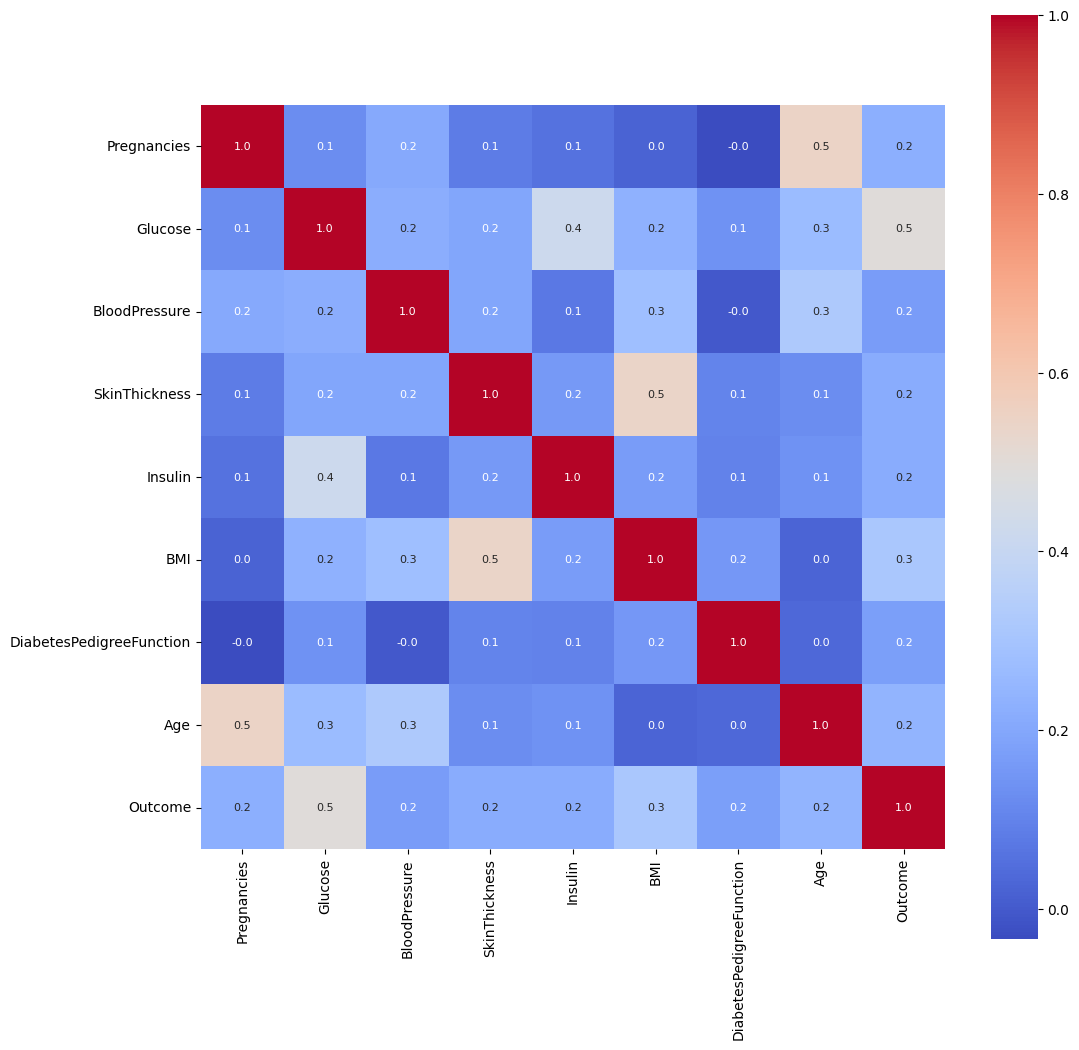

In [11]:
# Calculate correlation matrix
corr = diabetes.corr()
# constructing a heatmap to nderstand the correlation
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,12))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True, 
            annot_kws={'size':8}, cmap='coolwarm')

##  **Data Preparation**

Pada bagian ini kita akan melakukan 2 tahap persiapan data, yaitu:<br>

- Pembagian dataset dengan fungsi train_test_split dari library sklearn.
- Standarisasi.

### Train-Test-Split

In [12]:
from sklearn.model_selection import train_test_split
 
X = diabetes.drop(["Outcome"],axis =1)
y = diabetes["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

In [13]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 768
Total # of sample in train dataset: 691
Total # of sample in test dataset: 77


### Standarisasi 

Algoritma machine learning memiliki performa lebih baik dan konvergen lebih cepat ketika dimodelkan pada data dengan skala relatif sama atau mendekati distribusi normal. Proses scaling dan standarisasi membantu untuk membuat fitur data menjadi bentuk yang lebih mudah diolah oleh algoritma. <BR>

Standardisasi adalah teknik transformasi yang paling umum digunakan dalam tahap persiapan pemodelan. Untuk fitur numerik, kita tidak akan melakukan transformasi dengan one-hot-encoding seperti pada fitur kategori. Kita akan menggunakan teknik StandarScaler dari library Scikitlearn, <BR>

StandardScaler melakukan proses standarisasi fitur dengan mengurangkan mean (nilai rata-rata) kemudian membaginya dengan standar deviasi untuk menggeser distribusi.  StandardScaler menghasilkan distribusi dengan standar deviasi sama dengan 1 dan mean sama dengan 0. Sekitar 68% dari nilai akan berada di antara -1 dan 1.<BR>

Untuk menghindari kebocoran informasi pada data uji, kita hanya akan menerapkan fitur standarisasi pada data latih. Kemudian, pada tahap evaluasi, kita akan melakukan standarisasi pada data uji. Untuk lebih jelasnya, mari kita terapkan StandardScaler pada data. 

In [14]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

proses standarisasi mengubah nilai rata-rata (mean) menjadi 0 

## **Model Development dengan K-Nearest Neighbor**

Pemilihan nilai k sangat penting dan berpengaruh terhadap performa model. Jika kita memilih k yang terlalu rendah, maka akan menghasilkan model yang overfit dan hasil prediksinya memiliki varians tinggi. Jika kita memilih k terlalu tinggi, maka model yang dihasilkan akan underfit dan prediksinya memiliki bias yang tinggi. Namun, kita dapat mencoba beberapa nilai k yang berbeda, misal: nilai dari 1 hingga 20, kemudian membandingkan mana nilai yang paling sesuai untuk model. <BR>

Selanjutnya, untuk menentukan titik mana dalam data yang paling mirip dengan input baru, KNN menggunakan perhitungan ukuran jarak. Metrik ukuran jarak yang digunakan secara default pada library sklearn adalah Minkowski distance. Beberapa metrik ukuran jarak yang juga sering dipakai antara lain: Euclidean distance dan Manhattan distance. Sebagai contoh, jarak Euclidean dihitung sebagai akar kuadrat dari jumlah selisih kuadrat antara titik a dan titik b. Dirumuskan sebagai berikut:<BR>

![Teks alternatif](gambar/20210716180938b1e99726c5306d8b31798f8ae80c70d9.jpeg)<BR>

Sedangkan, Minkowski distance merupakan generalisasi dari Euclidean dan Manhattan distance. Untuk menghitungnya, perhatikan rumus berikut:<BR>

![Teks alternatif](gambar/77.jpeg)<BR>

Model Development yang akan kita buat model machine learning dangan algoritma berikut:<br>

- K-Nearest Neighbor (KNN)<br>

Mari siapkan data frame untuk analisis model tersebut lebih dahulu.

In [15]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN'])

In [16]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
 
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
 
models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

Kita menggunakan k = 10 tetangga dan metric Euclidean untuk mengukur jarak antara titik. Pada tahap ini kita hanya melatih data training dan menyimpan data testing untuk tahap evaluasi yang akan dibahas di Modul Evaluasi Model.<br>

## **Evaluasi Model**

Mengevaluasi model regresi sebenarnya relatif sederhana. Secara umum, hampir semua metrik adalah sama. Jika prediksi mendekati nilai sebenarnya, performanya baik. Sedangkan jika tidak, performanya buruk. Secara teknis, selisih antara nilai sebenarnya dan nilai prediksi disebut eror. Maka, semua metrik mengukur seberapa kecil nilai eror tersebut.<br>

Metrik yang akan kita gunakan pada prediksi ini adalah MSE atau Mean Squared Error yang menghitung jumlah selisih kuadrat rata-rata nilai sebenarnya dengan nilai prediksi. MSE didefinisikan dalam persamaan berikut<br>

![Teks alternatif](gambar/ff.jpeg)<br>

Keterangan:<br>

- N = jumlah dataset

- yi = nilai sebenarnya

- y_pred = nilai prediksi<br>


In [17]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN'])
 
# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn}
 
# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
 
# Panggil mse
mse

,train,test
KNN,0.000134,0.000141


Perhatikanlah potongan kode di atas. Saat menghitung nilai Mean Squared Error pada data train dan test, kita membaginya dengan nilai 1e3. Hal ini bertujuan agar nilai mse berada dalam skala yang tidak terlalu besar.

Untuk memudahkan, mari kita plot metrik tersebut dengan bar chart. Implementasikan kode di bawah ini:

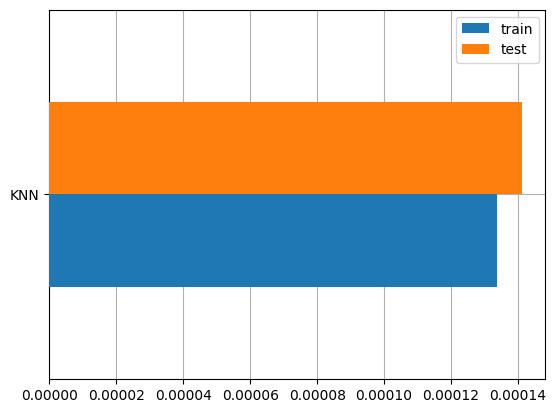

In [18]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

**Pada model KNN yang telah kita buat memiliki nilai MSE train yaitu 0.000134 dan MSE test yaitu 0.000141 ini artinya model KNN Anda tampaknya berkinerja baik pada dataset pelatihan dan pengujian, menunjukkan kesalahan yang rendah dalam memprediksi variabel target.**